## **Pregunta 1: Distribución de un parámetro**

• Genere artificialmente las siguientes variables:

$Xt$ con una distribución normal con media 0 y varianza 1 de 100 datos

$Et$ con una distribución normal con media 0 y varianza 1 de 100 datos

• Realice el siguiente Proceso Generador de Datos:

$$Yt=1.2+1.5*Xt+Et$$

• Luego estime una regresión lineal por MCO entre $Yt$ y $Xt$ y capture el coeficiente.

• Construya la prueba T para testear si el coeficiente estimado para $Xt$ es 1.6.

• Realice el procedimiento 10000 veces y calcule la potencia de la prueba T (recuerde que la potencia de la prueba es la probabilidad de rechazar la hipótesis nula dado que es falsa).

• Ahora considere un cambio en el Proceso Generador de Datos, considerando un $Et$ que siga una distribución chi-cuadrado con 1 grado de libertad. Estime una regresión lineal por MCO entre Yt y Xt y capture el coeficiente.

• Construya la prueba T para testear si el coeficiente estimado para $Xt$ es 1.6.

• Realice el procedimiento 10000 veces y calcule la potencia de la prueba T (recuerde que la potencia de la prueba es la probabilidad de rechazar la hipótesis nula dado que es falsa).

• ¿Cuál potencia es mayor? Justifique su respuesta.




**Fórmula de la distribución normal**

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} \, e^{ -\frac{1}{2} \left( \frac{x - \mu}{\sigma} \right)^2 }
$$


In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm, probplot
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

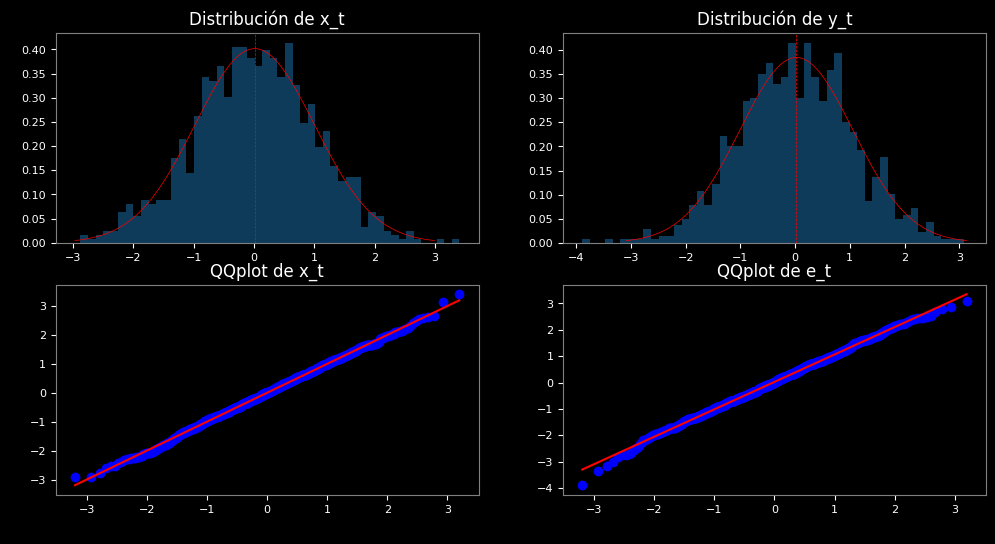

In [46]:
# Generar artificialmente las siguientes variables:
u = 0
var = 1
x_t = 1.*np.random.randn(1000, 1) + 0
e_t = 1.*np.random.randn(1000, 1) + 0
u_x_t, u_e_t= np.mean(x_t), np.mean(e_t)
sigma_x_t, sigma_e_t = np.std(x_t), np.std(e_t)
x_vals_x_t, x_vals_e_t = np.linspace(u_x_t - 3*sigma_x_t, u_x_t + 3*sigma_x_t, 500), np.linspace(u_e_t - 3*sigma_e_t, u_e_t + 3*sigma_e_t, 500)
y_vals_x_t, y_vals_e_t = norm.pdf(x_vals_x_t, u_x_t, sigma_x_t), norm.pdf(x_vals_e_t, u_e_t, sigma_e_t)

# Graficar la distribución de ambas variables

fig, ax = plt.subplots(2, 2, figsize=(12, 6), facecolor="black")

ax[0, 0].hist(x_t, bins=50, density=True, alpha=0.5)
ax[0, 0].axvline(x=u_x_t, color='red', linestyle='--', linewidth=0.5)
ax[0, 0].plot(x_vals_x_t, y_vals_x_t, color='red', linewidth=0.5)
ax[0, 0].title.set_text('Distribución de x_t',)
ax[0, 0].set_facecolor("black")
ax[0, 1].hist(e_t, bins=50, density=True, alpha=0.5)
ax[0, 1].axvline(x=u_e_t, color='red', linestyle='--', linewidth=0.5)
ax[0, 1].plot(x_vals_e_t, y_vals_e_t, color='red', linewidth=0.5)
ax[0, 1].title.set_text('Distribución de y_t')
ax[0, 1].set_facecolor("black")
probplot(x_t.ravel(), dist="norm", plot=ax[1, 0])
ax[1, 0].title.set_text('QQplot de x_t')
ax[1, 0].set_facecolor("black")
probplot(e_t.ravel(), dist="norm", plot=ax[1, 1])
ax[1, 1].title.set_text('QQplot de e_t')
ax[1, 1].set_facecolor("black")

for row in ax:
    for a in row:
        a.tick_params(color="white")
        a.tick_params(axis="x", labelcolor="white", labelsize=8)
        a.tick_params(axis="y", labelcolor="white", labelsize=8)
        a.title.set_color("white")
        for spine in a.spines.values():
            spine.set_edgecolor("gray")
plt.show()

In [36]:
# Proceso Generador de Datos

y_t = 1.2 + 1.5 * x_t + e_t

In [54]:
# Estimación de una regresión lineal por MCO entre Yt y Xt

model = LinearRegression().fit(x_t, y_t)
print(f"El coeficiente estimado para Xt es {model.coef_[0]} y el bias es {model.intercept_}.")

El coeficiente estimado para Xt es [0.01044481] y el bias es [1.20772647].
